# Factor Analysis

In this notebook I use factor analysis to re-derive the 5 personality factors. I then attempt to use factor analysis to split each of the five factors into sub-factors. Finally I compare the results of Kaiser rule and parallel analysis in determining the number of factors in the data.

### Imports

In [39]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [40]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import numpy as np
import matplotlib.pyplot as plt

## Re-Derive 5 Factors

In [41]:
# load preprocessed data from notebook 1
df = pd.read_csv('answers.csv')
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,3.0,5.0,5.0,...,4.0,5.0,3.0,5.0,5.0,5.0,4.0,2.0,5.0,5.0
1,2.0,4.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,2.0
2,5.0,5.0,1.0,2.0,5.0,5.0,1.0,1.0,5.0,5.0,...,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,2.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,4.0,1.0,...,4.0,3.0,5.0,4.0,4.0,4.0,5.0,2.0,5.0,5.0
4,3.0,5.0,3.0,3.0,3.0,5.0,3.0,5.0,3.0,1.0,...,3.0,5.0,1.0,5.0,3.0,5.0,3.0,1.0,5.0,3.0


In [42]:
df.shape

(19030, 50)

In [43]:
# check if the variables correlate to one another
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# p value is 0, the variables correlate to one another, so we can proceed with factor analysis

(363504.68168251665, 0.0)

In [44]:
# use kmo test to estimate the proportion of variance among all observed variables
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model
# kmo is ~0.91, much higher than the 0.6 threshold necessary for factor analysis

0.9098527205592912

In [45]:
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()

In [46]:
eigen_values

array([8.04368078, 4.61658805, 3.75732945, 3.54946071, 2.76318086,
       1.57228661, 1.33295958, 1.04982648, 0.96754539, 0.92504509,
       0.89668953, 0.86743883, 0.84405461, 0.80165305, 0.78780038,
       0.7345542 , 0.7299833 , 0.7191908 , 0.68124246, 0.66255998,
       0.65761061, 0.63521361, 0.61196536, 0.59020821, 0.58289613,
       0.56839695, 0.55386387, 0.53415723, 0.52304043, 0.51082848,
       0.50186238, 0.49207834, 0.48801932, 0.48228838, 0.44871097,
       0.44750701, 0.43548609, 0.42078905, 0.41562808, 0.40416363,
       0.39743042, 0.38009036, 0.37363276, 0.36406004, 0.34778225,
       0.3444921 , 0.32659334, 0.32370478, 0.31288441, 0.22154527])

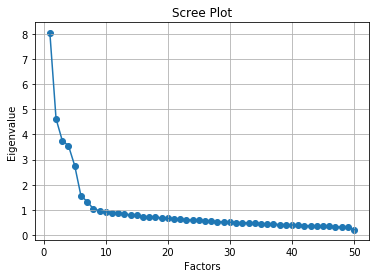

In [47]:
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [88]:
# based on the Kaiser rule, I should try to identify 8 factors
fa.set_params(n_factors=8, rotation='varimax')
fa.fit(df)
factors = pd.DataFrame(fa.loadings_)
factors.index = df.columns

In [89]:
factors

,0,1,2,3,4,5,6,7
E1,0.656351,-0.076419,0.074339,0.008451,0.067779,-0.008198,-0.142719,0.102750
E2,0.696435,0.024206,0.113210,-0.021318,0.022369,0.017024,0.059458,-0.133178
E3,0.641501,-0.268872,0.269390,0.132308,-0.008539,-0.012055,-0.118591,0.049449
E4,0.722254,-0.126758,0.048049,0.030926,-0.004490,-0.017315,0.113255,-0.064711
E5,0.720832,-0.079294,0.223064,0.101938,0.047062,0.054217,-0.070201,-0.008364
E6,0.595692,-0.055775,0.143568,0.038422,0.141099,0.140318,0.165217,-0.164680
E7,0.721179,-0.111389,0.172903,0.046807,0.016056,0.033454,-0.096986,0.052220
E8,0.565019,-0.028091,-0.040105,-0.059164,0.066792,-0.044637,0.040740,0.027646
E9,0.606654,-0.062137,0.000327,-0.007811,0.132245,0.023838,-0.082977,0.107456
E10,0.656489,-0.165968,0.056514,0.030953,-0.001029,0.005615,0.097463,-0.025319


In [48]:
# try with just 5 to match theory
fa.set_params(n_factors=5, rotation='varimax')
fa.fit(df)
factors = pd.DataFrame(fa.loadings_)
factors.index = df.columns

In [51]:
factors

,0,1,2,3,4
E1,0.670818,-0.057000,0.063001,0.009939,0.039399
E2,0.677190,-0.006166,0.124880,-0.026324,0.039215
E3,0.650941,-0.257557,0.260238,0.132085,-0.011409
E4,0.702360,-0.154994,0.059151,0.022633,0.008337
E5,0.724849,-0.079054,0.218392,0.100636,0.073757
E6,0.564150,-0.091957,0.158520,0.027091,0.221946
E7,0.729161,-0.102579,0.163066,0.046657,0.033981
E8,0.562941,-0.035126,-0.036482,-0.064014,0.031491
E9,0.618161,-0.044801,-0.008879,-0.008945,0.115618
E10,0.642179,-0.186051,0.062528,0.023013,0.024532


### Observations
Based on the factor loadings, the first 5 factors line up well with the 5 factors of the OCEAN model.  
Factor 1 - Extraversion  
Factor 2 - Neuroticism  
Factor 3 - Agreeableness  
Factor 4 - Conscientiousness   
Factor 5 - Openness    
The next 2 factors seem to explain some sub-dimensions of openness, and could indicate that openness is a good candidate for looking for sub-factors.  
The final factor doesn't seem to line up well with anything, and is probably best explained by noise.  Note that at the bottom of this notebook I use parallel analysis, rather than the Kaiser rule, to determine the number of factors, and only 7 factors come out.

## Split into Sub-factors

In [52]:
E = df.loc[:,'E1':'E10']
N = df.loc[:,'N1':'N10']
A = df.loc[:,'A1':'A10']
C = df.loc[:,'C1':'C10']
O = df.loc[:,'O1':'O10']

In [53]:
# check if the variables correlate to one another
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,E_p_value=calculate_bartlett_sphericity(E)
chi_square_value,N_p_value=calculate_bartlett_sphericity(N)
chi_square_value,A_p_value=calculate_bartlett_sphericity(A)
chi_square_value,C_p_value=calculate_bartlett_sphericity(C)
chi_square_value,O_p_value=calculate_bartlett_sphericity(O)
E_p_value, N_p_value, A_p_value, C_p_value, O_p_value
# p values are 0, the variables correlate to one another, so we can proceed with factor analysis

(0.0, 0.0, 0.0, 0.0, 0.0)

In [54]:
# use kmo test to estimate the proportion of variance among all observed variables
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,E_kmo_model=calculate_kmo(E)
kmo_all,N_kmo_model=calculate_kmo(N)
kmo_all,A_kmo_model=calculate_kmo(A)
kmo_all,C_kmo_model=calculate_kmo(C)
kmo_all,O_kmo_model=calculate_kmo(O)
E_kmo_model, N_kmo_model, A_kmo_model, C_kmo_model, O_kmo_model
# kmo is 0.78-0.92, much higher than the 0.6 threshold necessary for factor analysis

(0.9234239374743071,
 0.8900464788531263,
 0.8846931791446637,
 0.8748680407342384,
 0.7773622643026067)

In [55]:
E_fa = FactorAnalyzer()
N_fa = FactorAnalyzer()
A_fa = FactorAnalyzer()
C_fa = FactorAnalyzer()
O_fa = FactorAnalyzer()
E_fa.fit(E)
N_fa.fit(N)
A_fa.fit(A)
C_fa.fit(C)
O_fa.fit(O)
E_eigen_values, vectors = E_fa.get_eigenvalues()
N_eigen_values, vectors = N_fa.get_eigenvalues()
A_eigen_values, vectors = A_fa.get_eigenvalues()
C_eigen_values, vectors = C_fa.get_eigenvalues()
O_eigen_values, vectors = O_fa.get_eigenvalues()

In [56]:
E_eigen_values, N_eigen_values, A_eigen_values, C_eigen_values, O_eigen_values, 

(array([5.1073214 , 0.90589693, 0.81540236, 0.58849341, 0.53259965,
        0.46524575, 0.44991186, 0.41411613, 0.38633189, 0.33468062]),
 array([4.65714208, 1.03755827, 0.95027248, 0.68397288, 0.60874376,
        0.54483565, 0.49141591, 0.41692778, 0.384087  , 0.2250442 ]),
 array([4.16670993, 1.01431248, 0.91095232, 0.8327483 , 0.70320031,
        0.61046086, 0.54976741, 0.5045439 , 0.36945695, 0.33784754]),
 array([3.74814817, 1.15127981, 0.85456448, 0.81794732, 0.67184825,
        0.63178954, 0.60078812, 0.52806639, 0.51893611, 0.47663181]),
 array([3.57797941, 1.27649799, 1.0713396 , 0.99354673, 0.84869614,
        0.64237007, 0.45806297, 0.42510576, 0.36682845, 0.33957287]))

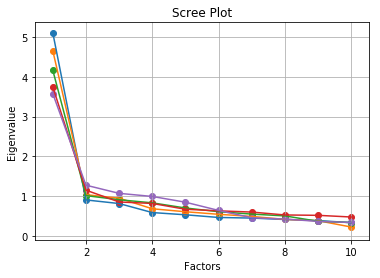

In [57]:
plt.scatter(range(1,E.shape[1]+1),E_eigen_values)
plt.plot(range(1,E.shape[1]+1),E_eigen_values)
plt.scatter(range(1,E.shape[1]+1),N_eigen_values)
plt.plot(range(1,E.shape[1]+1),N_eigen_values)
plt.scatter(range(1,E.shape[1]+1),A_eigen_values)
plt.plot(range(1,E.shape[1]+1),A_eigen_values)
plt.scatter(range(1,E.shape[1]+1),C_eigen_values)
plt.plot(range(1,E.shape[1]+1),C_eigen_values)
plt.scatter(range(1,E.shape[1]+1),O_eigen_values)
plt.plot(range(1,E.shape[1]+1),O_eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [94]:
O_fa.set_params(n_factors=3, rotation='varimax')
O_fa.fit(O)
factors = pd.DataFrame(O_fa.loadings_)
factors.index = O.columns

In [95]:
factors

,0,1,2
O1,0.175927,0.802853,0.150116
O2,0.153289,0.194863,0.966886
O3,0.581373,0.129493,0.115859
O4,0.239254,0.146123,0.488352
O5,0.587814,0.250635,0.130600
O6,0.604040,0.047409,0.189404
O7,0.270131,0.314022,0.246556
O8,0.130863,0.724659,0.124314
O9,0.185978,0.191434,0.119686
O10,0.744905,0.216981,0.156528


### Observations
Based on this scree plot, the 5 factors do not seem to split into sub-factors. Based on the Kaiser rule, extraversion does not split, conscientiousness splits into 3, and the others split into 2, but just from looking at the scree plot it's clear thant only one sub-factor in each factor lands outside of the scree.  
  
Based on the fact that openness had the most sub-factors and seemed to be the cause of 2 of the extra factors in the previous section, I decided to take a closer look at its sub-factors.  
  
This is the question list for openness:  
O1	I have a rich vocabulary.  
O2	I have difficulty understanding abstract ideas.  
O3	I have a vivid imagination.  
O4	I am not interested in abstract ideas.  
O5	I have excellent ideas.  
O6	I do not have a good imagination.  
O7	I am quick to understand things.  
O8	I use difficult words.  
O9	I spend time reflecting on things.  
O10	I am full of ideas. 
  
The best sub-factors I could determine were:  
0: imagination  
1: interest in words  
2: interest in abstract ideas  

## Parallel Analysis

In [80]:
all_pa_eigenvalues = []
for i in range(30):
    pa_df = pd.DataFrame(np.random.randint(1,5,size=(19030, 50)), columns=df.columns)
    fa = FactorAnalyzer()
    fa.fit(pa_df)
    pa_eigen_values, vectors = fa.get_eigenvalues()
    all_pa_eigenvalues.append(pa_eigen_values)

for ind in range(len(all_pa_eigenvalues[0])):
    nth_eigs = [x[ind] for x in all_pa_eigenvalues]
    pa_eigen_values[ind] = np.percentile(nth_eigs,95)

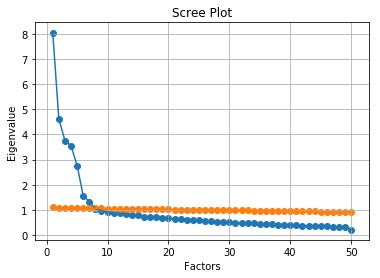

In [81]:
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.scatter(range(1,df.shape[1]+1),pa_eigen_values)
plt.plot(range(1,df.shape[1]+1),pa_eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [84]:
# number of factors based on parallel analysis
(0 < eigen_values - pa_eigen_values).sum()

7

In [85]:
# number of factors based on the Kaiser rule
(0 < eigen_values - 1).sum()

8

### Observations
Parallel analysis gives us very similar results to the Kaiser rule. This is probably because with approximately 19000 samples, the randomness in the data is quite small, so the randomly generated data has eigenvalues which converge quite closely to 1. Note that the one factor left out by parallel analysis is the same factor which didn't load well onto anything in the first section, indicating that it was likely noise.